In [2]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
from gensim.models import Word2Vec
import matplotlib.pyplot as plt



In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/grigorijarhipov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/grigorijarhipov/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/grigorijarhipov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

In [5]:
def preprocess_text(data):
  lemmatizer = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))

  processed_text = []

  for review in data['Review']:
    # Lowercase the text
    review = review.lower()

    # Tokenize the text
    tokens = word_tokenize(review)

    # Remove punctuation
    tokens = [token for token in tokens if token.isalpha()]

    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a string
    processed_text.append(' '.join(tokens))

  return processed_text

In [6]:
new_data = {}

In [7]:
new_data['Preprocessed'] = preprocess_text(data)

In [8]:
new_data

{'Preprocessed': ['mcdonald food ok service bad',
  'would recommend japanese restaurant anyone',
  'loved restaurant traveled thailand last summer',
  'menu loving wide variety option',
  'staff friendly helpful google employee restaurant',
  'ambiance bella italia amazing pasta dish delicious',
  'terrible experience pizza hut pizza burnt service slow',
  'sushi sushi express always fresh flavorful',
  'steakhouse main street cozy atmosphere excellent steak',
  'dessert selection sweet treat die']}

In [9]:
def perform_ner(text):
  nlp = spacy.load('en_core_web_sm')
  doc = nlp(text)
  for entity in doc.ents:
    print(entity.text, entity.label_)

In [10]:
for review in data['Review']:
  perform_ner(review)

McDonald's ORG
Japanese NORP
Thailand GPE
last summer DATE
Loving GPE
Google ORG
Bella Italia ORG
Pizza Hut ORG
Sushi Express ORG
Main Street FAC
Sweet Treats FAC


In [11]:
for review in new_data['Preprocessed']:
  perform_ner(review)

mcdonald food ok service ORG
japanese NORP
thailand GPE
last summer DATE
google ORG
ambiance bella italia ORG
sushi sushi express PERSON


In [12]:
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/grigorijarhipov/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/grigorijarhipov/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [13]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [14]:
def perform_pos_tagging(text):
  # Perform POS tagging using NLTK
  pos_tags = nltk.pos_tag(nltk.word_tokenize(text))

  # Print the POS tags
  for word, tag in pos_tags:
    print(f"{word}: {tag}")


In [15]:
for review in data['Review']:
  perform_pos_tagging(review)

At: IN
McDonald: NNP
's: POS
the: DT
food: NN
was: VBD
ok: JJ
and: CC
the: DT
service: NN
was: VBD
bad: JJ
.: .
I: PRP
would: MD
not: RB
recommend: VB
this: DT
Japanese: JJ
restaurant: NN
to: TO
anyone: NN
.: .
I: PRP
loved: VBD
this: DT
restaurant: NN
when: WRB
I: PRP
traveled: VBD
to: TO
Thailand: NNP
last: JJ
summer: NN
.: .
The: DT
menu: NN
of: IN
Loving: NNP
has: VBZ
a: DT
wide: JJ
variety: NN
of: IN
options: NNS
.: .
The: DT
staff: NN
was: VBD
friendly: JJ
and: CC
helpful: JJ
at: IN
Google: NNP
's: POS
employees: NNS
restaurant: VBP
.: .
The: DT
ambiance: NN
at: IN
Bella: NNP
Italia: NNP
is: VBZ
amazing: JJ
,: ,
and: CC
the: DT
pasta: NN
dishes: NNS
are: VBP
delicious: JJ
.: .
I: PRP
had: VBD
a: DT
terrible: JJ
experience: NN
at: IN
Pizza: NNP
Hut: NNP
.: .
The: DT
pizza: NN
was: VBD
burnt: VBN
,: ,
and: CC
the: DT
service: NN
was: VBD
slow: JJ
.: .
The: DT
sushi: NN
at: IN
Sushi: NNP
Express: NNP
is: VBZ
always: RB
fresh: JJ
and: CC
flavorful: JJ
.: .
The: DT
steakhouse: NN
on: 

In [16]:
for review in new_data['Preprocessed']:
  perform_pos_tagging(review)

mcdonald: NNS
food: NN
ok: JJ
service: NN
bad: JJ
would: MD
recommend: VB
japanese: JJ
restaurant: NN
anyone: NN
loved: VBN
restaurant: NN
traveled: VBN
thailand: NN
last: JJ
summer: NN
menu: NN
loving: VBG
wide: JJ
variety: NN
option: NN
staff: NN
friendly: RB
helpful: JJ
google: NN
employee: NN
restaurant: NN
ambiance: NN
bella: NN
italia: NN
amazing: VBG
pasta: JJ
dish: JJ
delicious: NN
terrible: JJ
experience: NN
pizza: NN
hut: NN
pizza: NN
burnt: JJ
service: NN
slow: VB
sushi: NN
sushi: NN
express: NN
always: RB
fresh: JJ
flavorful: NN
steakhouse: NN
main: JJ
street: NN
cozy: NNS
atmosphere: RB
excellent: JJ
steak: NN
dessert: JJ
selection: NN
sweet: JJ
treat: NN
die: NN


In [19]:

tokenized_data = [word_tokenize(doc) for doc in new_data['Preprocessed']]

# Create the Word2Vec model
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=4, min_count=1, workers=6)

# Get the word embeddings
embeddings = model.wv.vectors

# Print the word embeddings
for word, embedding in zip(model.wv.index_to_key, embeddings):
  print(f"{word}: {embedding}")


restaurant: [-5.3748046e-04  2.3663223e-04  5.1038153e-03  9.0118637e-03
 -9.3035642e-03 -7.1151122e-03  6.4609214e-03  8.9732371e-03
 -5.0159045e-03 -3.7619104e-03  7.3796525e-03 -1.5324547e-03
 -4.5344429e-03  6.5535735e-03 -4.8611960e-03 -1.8166758e-03
  2.8766440e-03  9.9011173e-04 -8.2867919e-03 -9.4511090e-03
  7.3114033e-03  5.0715585e-03  6.7596016e-03  7.6204439e-04
  6.3489722e-03 -3.4068450e-03 -9.4638416e-04  5.7675932e-03
 -7.5237490e-03 -3.9349641e-03 -7.5102081e-03 -9.3022827e-04
  9.5394384e-03 -7.3206038e-03 -2.3330548e-03 -1.9368851e-03
  8.0757113e-03 -5.9331148e-03  4.4989571e-05 -4.7550681e-03
 -9.6039763e-03  5.0079790e-03 -8.7613463e-03 -4.3909596e-03
 -3.2858079e-05 -2.9503493e-04 -7.6608649e-03  9.6140364e-03
  4.9832547e-03  9.2321718e-03 -8.1557529e-03  4.4951881e-03
 -4.1371519e-03  8.2284393e-04  8.4992601e-03 -4.4615162e-03
  4.5168945e-03 -6.7869076e-03 -3.5488952e-03  9.3974778e-03
 -1.5787296e-03  3.1897071e-04 -4.1419906e-03 -7.6843402e-03
 -1.5085279e

In [20]:
model.wv.index_to_key

['restaurant',
 'service',
 'pizza',
 'sushi',
 'die',
 'summer',
 'google',
 'helpful',
 'friendly',
 'staff',
 'option',
 'variety',
 'wide',
 'loving',
 'menu',
 'last',
 'ambiance',
 'thailand',
 'traveled',
 'loved',
 'anyone',
 'japanese',
 'recommend',
 'would',
 'bad',
 'ok',
 'food',
 'employee',
 'italia',
 'bella',
 'treat',
 'sweet',
 'selection',
 'dessert',
 'steak',
 'excellent',
 'atmosphere',
 'cozy',
 'street',
 'main',
 'steakhouse',
 'flavorful',
 'fresh',
 'always',
 'express',
 'slow',
 'burnt',
 'hut',
 'experience',
 'terrible',
 'delicious',
 'dish',
 'pasta',
 'amazing',
 'mcdonald']

The vector dimensions are 100. This means that each word in the vocabulary is represented by a 100-dimensional vector. Each dimension in the vector corresponds to a different semantic aspect of the word. For example, one dimension might correspond to the word's sentiment, while another dimension might correspond to its formality. By using a high-dimensional vector space, we can capture more nuanced semantic information about the words in our vocabulary.

In [21]:
def plot_word_embeddings(model):
    # Get the word embeddings
    embeddings = model.wv.vectors

    # Create a scatter plot with the word embeddings
    plt.figure(figsize=(10, 10))
    plt.scatter(embeddings[:, 0], embeddings[:, 1])

    # Add labels to the plot
    for word, embedding in zip(model.wv.index_to_key, embeddings):
        plt.text(embedding[0], embedding[1], word)

    # Show the plot
    plt.show()


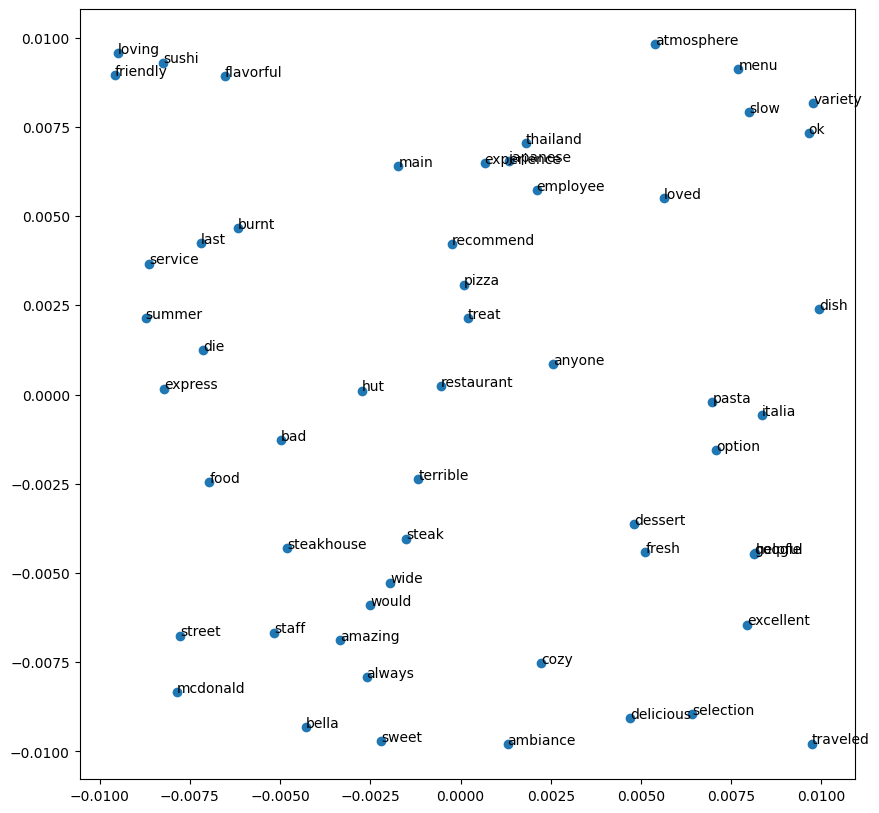

In [22]:
plot_word_embeddings(model)


In [27]:
example_result = model.wv.most_similar(positive = ['italia', 'restaurant'], negative=['pizza'], topn=3)

In [28]:
example_result

[('ambiance', 0.20000571012496948),
 ('staff', 0.19874243438243866),
 ('always', 0.19657103717327118)]